<a href="https://colab.research.google.com/github/Juandp624/Juandp624/blob/main/FINAL_arima_time_series_analysis_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with ARIMA Models for NEE, ENPH, AQB


The purpose of this project is to conduct a time series forecasting for three selected stocks: **NextEra Energy (NEE)**, **Enphase Energy (ENPH)**, and **AquaBounty Technologies (AQB)**.

This is done by completing the following:
1. Fetching and preprocessing the data from origin (Yahoo Finance)
2. Performing univariate, bivariate, and multivariate analysis on each dataset.
3. Builiding ARIMA models, both baseline and adjusted, based on ACF and PACF.
4. Evaluate the models using metrics such as MAE, MSE, RMSE, R-squared, and analyze the residuals.


#Data Set Selection

The datasets were collected from Yahoo Finance. More specifically, the following stocks were picked:

- **NextEra Energy, Inc. (NEE)** NextEra Energy is one of the largest producers of renewable energy in the world today, they mainly focuse on wind and solar power. The company's commitment to transitioning from fossil fuels to sustainable energy sources positions it as a key player in the emerging clean energy sector. Their ongoing investment in renewable infrastructure make them a critical choice for analyzing trends in the growing renewable energy market. https://finance.yahoo.com/quote/NEE/


- **Enphase Energy, Inc. (ENPH**) Enphase Energy is a leader in the solar technology sector. They specialize in solar microinverters and battery storage systems. As the global demand for solar power continues to rise, Enphase plays a pivotal role in enabling efficient energy generation and storage solutions, making it a significant stock to study and analyze. https://finance.yahoo.com/quote/ENPH/


- **AquaBounty Technologies, Inc. (AQB)** AquaBounty Technologies represents the intersection of biotechnology and sustainable food production. Through its innovative approach to aquaculture and a focus on genetically engineered fish that improve production efficiency and reduce the environmental impact of fish farming; AquaBounty addresses the need for sustainable solutions in the seafood industry. As current concerns regarding overfishing and the environmental effects of traditional aquaculture grow, AquaBounty's role in providing a sustainable alternative becomes increasingly vital.https://finance.yahoo.com/quote/AQB/

## Importing Libraries

In [ ]:

# Importing necessary libraries for time series analysis, modeling, and evaluation
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


## Fetching Stock Data

In [ ]:

# Define tickers and date range
tickers = ['NEE', 'ENPH', 'AQB']
start_date = '2019-01-01'
end_date = '2023-01-01'

# Download data for all tickers
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    print(f"{ticker} data fetched successfully.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NEE data fetched successfully.
ENPH data fetched successfully.


[*********************100%***********************]  1 of 1 completed

AQB data fetched successfully.


For the purpose of the assignment all datasets have a clear time compoenent of 5 years.

## Data Preprocessing


In this instance we handles missing values by using forward fill and backward fill. This is to ensure that any gaps in the dataset are filled with the most recent valid data. For this time series analysis, it is important to convert the index into the proper datetime format. Lastly, the data is resampled to a consistent daily frequency, filling in any missing days with the previous day’s data. All of these steps are essential to prepare the time series data for analysis.


In [ ]:

# Preprocess each stock's data by filling missing values and resampling
for ticker in tickers:
    stock_data = data[ticker]
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    stock_data.index = pd.to_datetime(stock_data.index)
    stock_data = stock_data.resample('D').ffill()  # Ensuring consistent daily intervals
    data[ticker] = stock_data
    print(f"Preprocessing done for {ticker}.")


Preprocessing done for NEE.
Preprocessing done for ENPH.
Preprocessing done for AQB.


<ipython-input-5-4d4612f8034b>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
<ipython-input-5-4d4612f8034b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)
<ipython-input-5-4d4612f8034b>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
<ipython-input-5-4d4612f8034b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)
<ipython-input-5-4d4612f8034b>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future

#Uni, bi, and multivariate analysis.


Exploratory Data Analysis for NEE


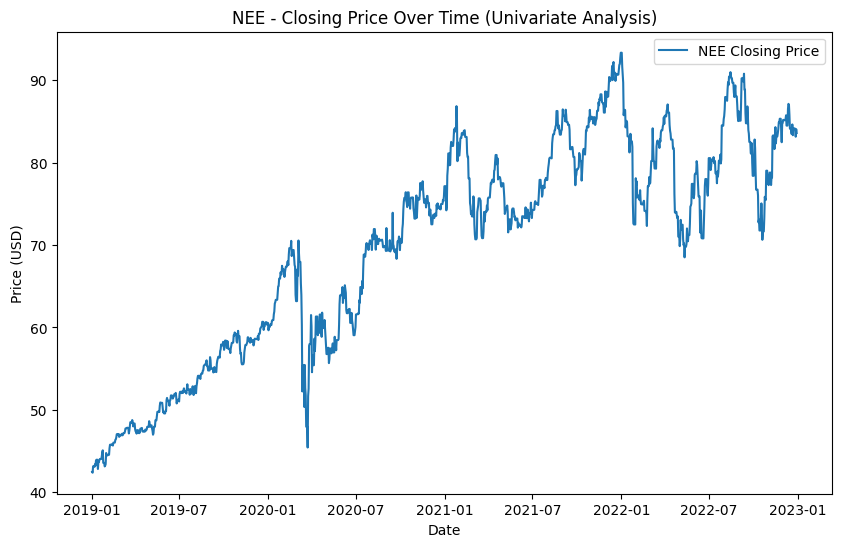

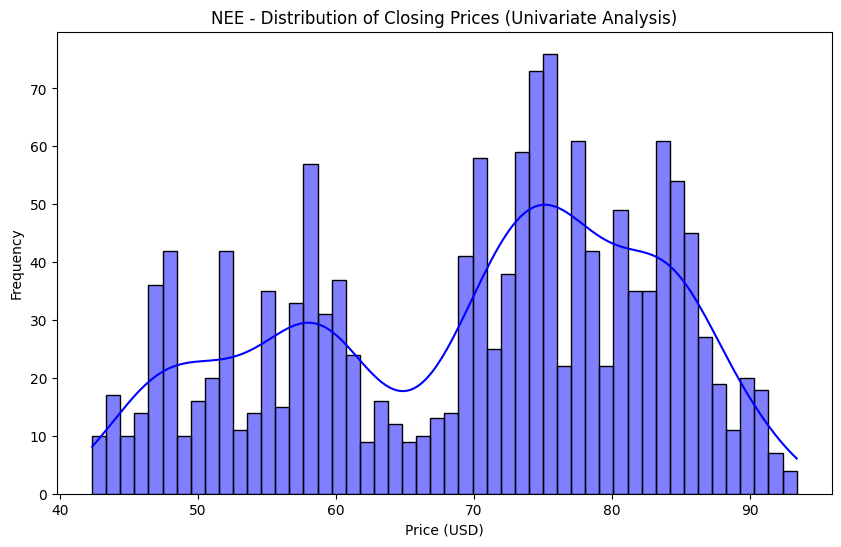

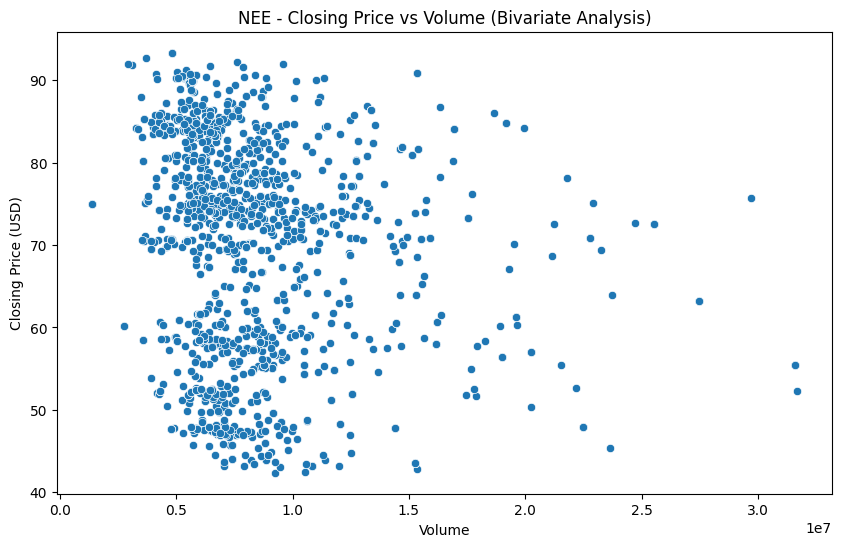

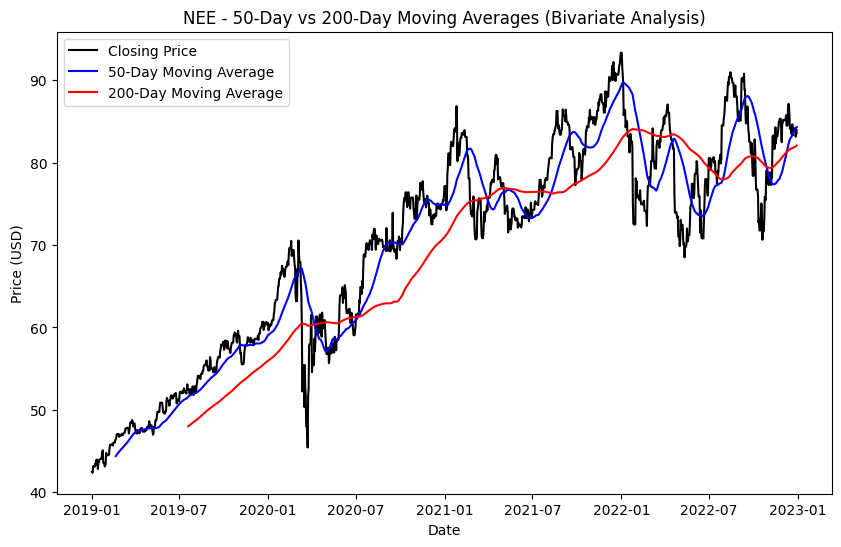

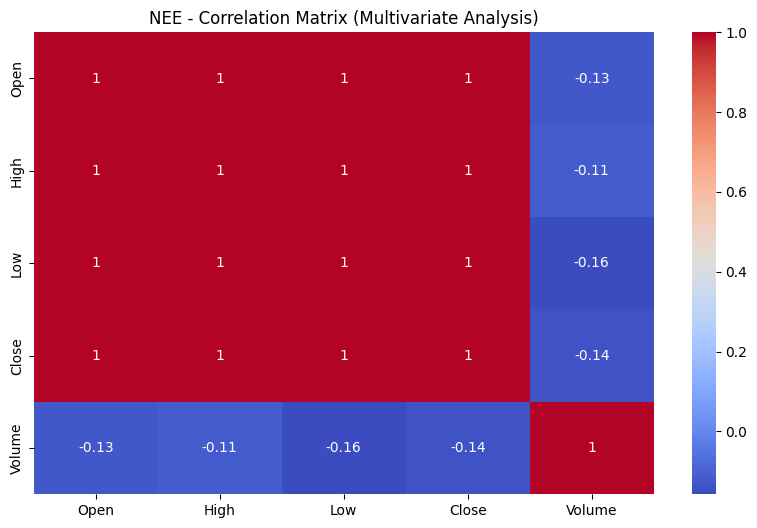


Exploratory Data Analysis for ENPH


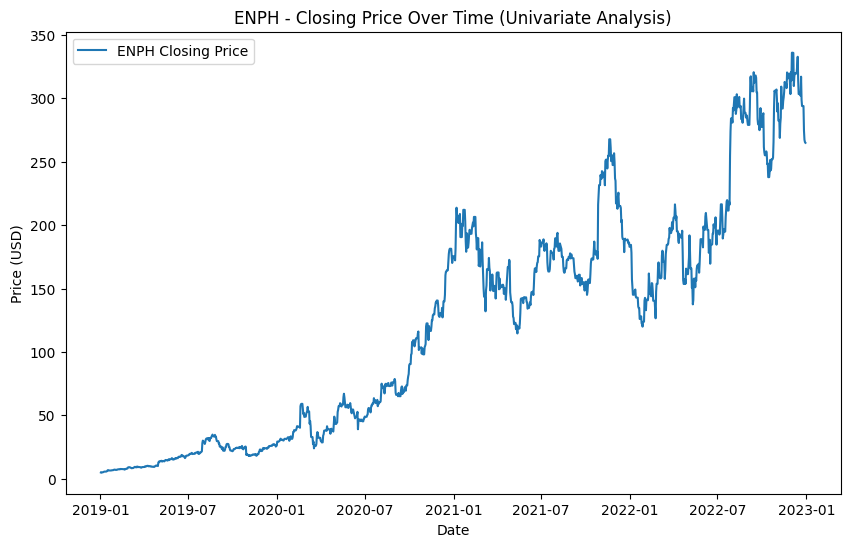

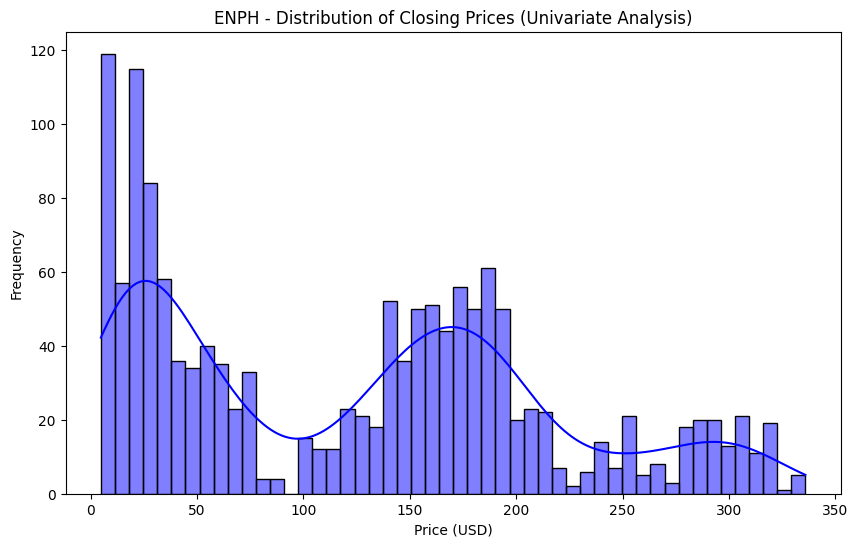

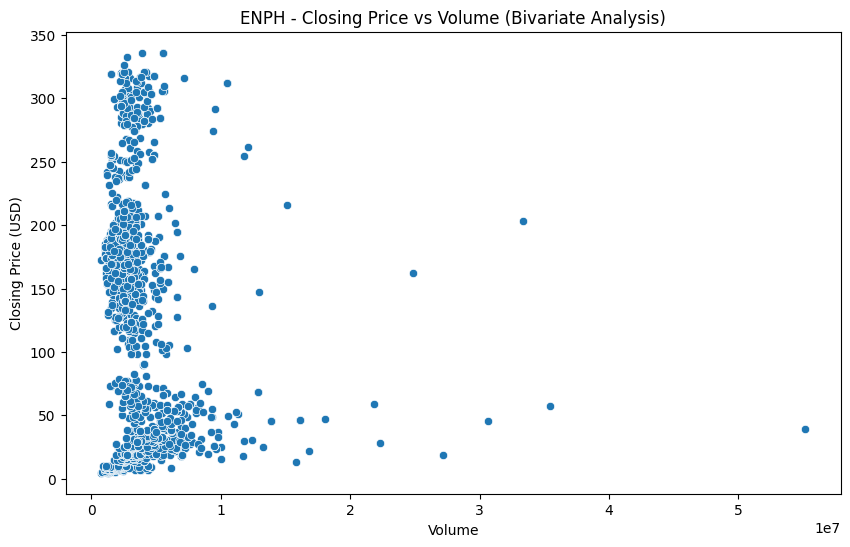

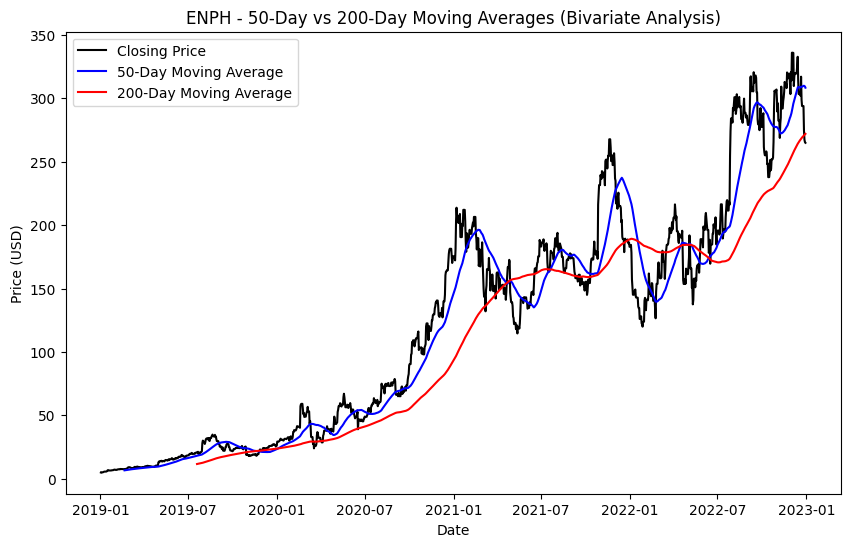

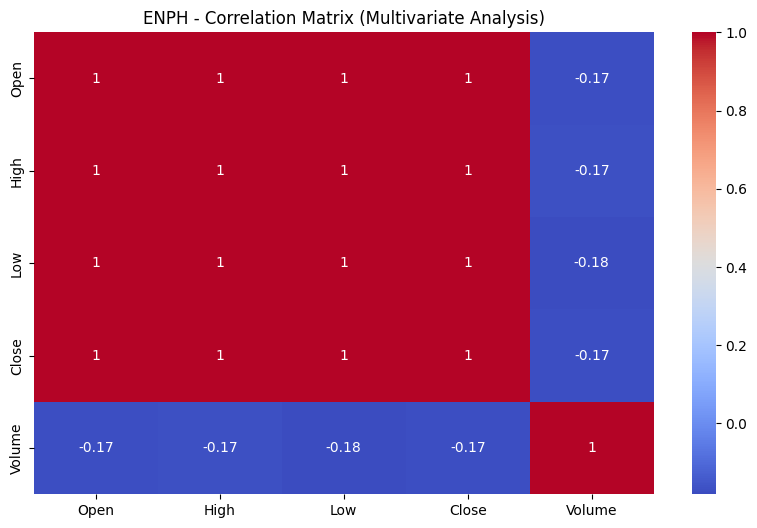


Exploratory Data Analysis for AQB


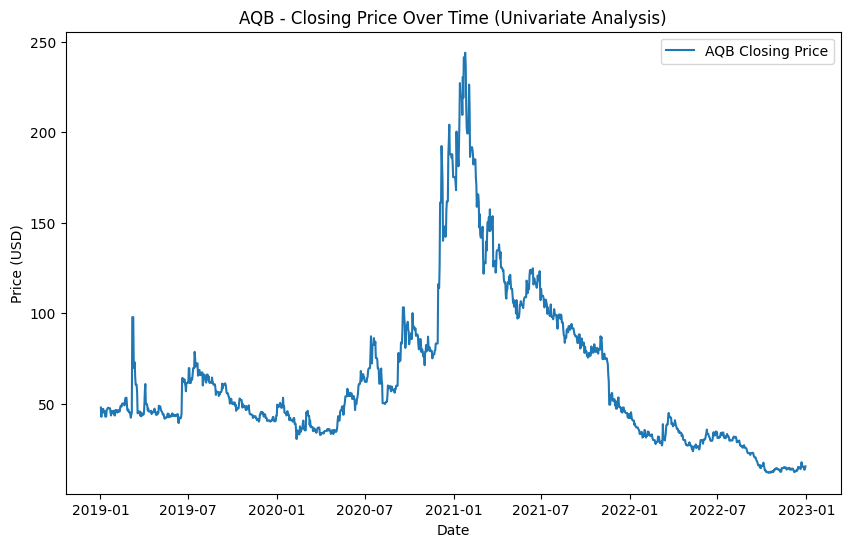

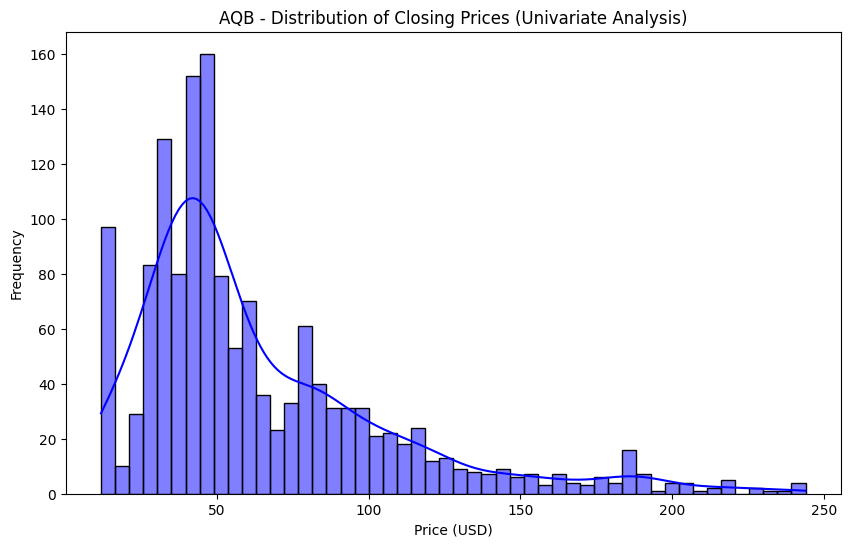

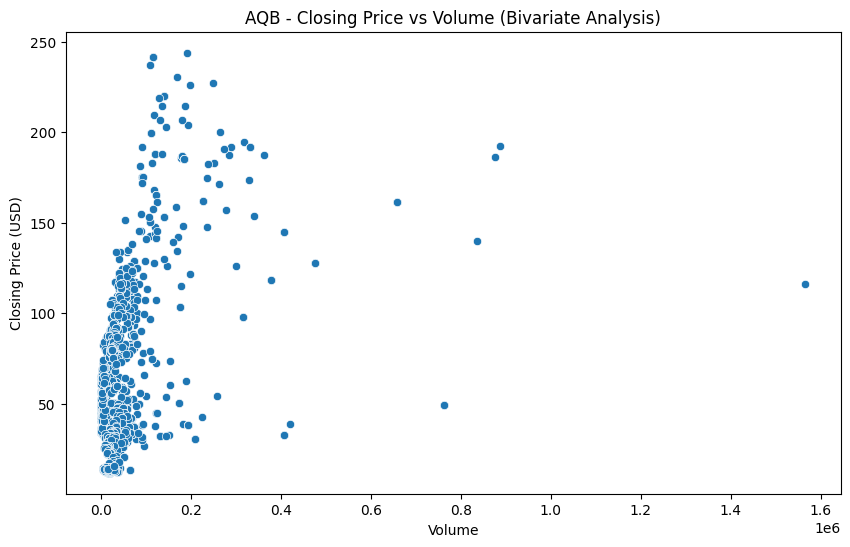

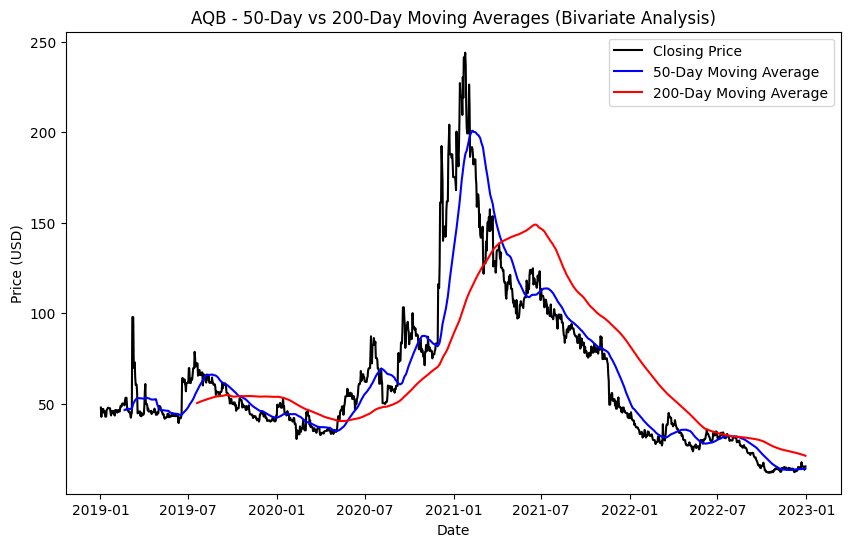

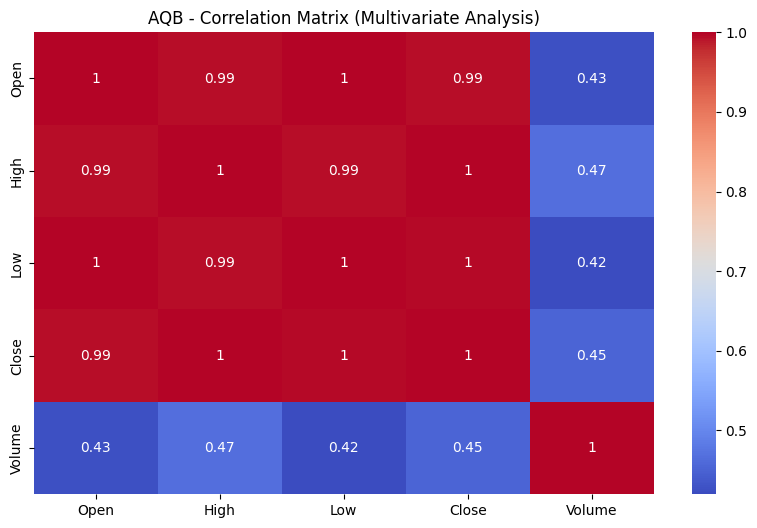

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate, Bivariate, and Multivariate EDA for each stock
for ticker in tickers:
    stock_data = data[ticker]

    print(f"\nExploratory Data Analysis for {ticker}")

    # Univariate Analysis: Closing price trends
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label=f'{ticker} Closing Price')
    plt.title(f'{ticker} - Closing Price Over Time (Univariate Analysis)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Univariate Analysis: Distribution of Closing Prices
    plt.figure(figsize=(10, 6))
    sns.histplot(stock_data['Close'], bins=50, kde=True, color='blue')
    plt.title(f'{ticker} - Distribution of Closing Prices (Univariate Analysis)')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

    # Bivariate Analysis: Closing Price vs Volume
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=stock_data['Volume'], y=stock_data['Close'])
    plt.title(f'{ticker} - Closing Price vs Volume (Bivariate Analysis)')
    plt.xlabel('Volume')
    plt.ylabel('Closing Price (USD)')
    plt.show()

    # Bivariate Analysis: Moving averages (e.g., 50-day vs 200-day Moving Average)
    stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Closing Price', color='black')
    plt.plot(stock_data['50_MA'], label='50-Day Moving Average', color='blue')
    plt.plot(stock_data['200_MA'], label='200-Day Moving Average', color='red')
    plt.title(f'{ticker} - 50-Day vs 200-Day Moving Averages (Bivariate Analysis)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # Multivariate Analysis: Correlation matrix (Close, Open, High, Low, Volume)
    plt.figure(figsize=(10, 6))
    sns.heatmap(stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'{ticker} - Correlation Matrix (Multivariate Analysis)')
    plt.show()


# NEE EDA

NEE:

**Uni:**

-  The line graph shows the trend of NextEra Energy (NEE)'s closing price from 2019 to 2023. This aids in identifying general trends, patterns, or any significant fluctuations in the stock price over the 5 year period. In this case, the stock shows an upward trend until 2021, followed by fluctuations with some notable peaks and drops. There's a sharp drop around the beginning of 2021, likely due to the broader market reaction to the COVID-19 pandemic. Afterward, the stock somewhat recovers. However, it fails to reach its pre-covid peak.


- In addition to the lin graph, I also included a histogram displaying the distribution of NEE's closing prices over the 5 year time period, with a kernel density estimate overlay to show the shape of the distribution more easily.
The distribution appears to be multimodal, with peaks around the $55, $65, and $75 price ranges, indicating that these are common trading price levels. The spread of prices is relatively wide, ranging from approximately 40 to 90, indicating significant price fluctuations. This suggests the stock has experienced various phases of growth and corrections over the 5 years we are looking at.

**Bi:**
- For the bivariate analysis we created a scatter plot that examines the relationship between the closing price and the trading volume for NEE.Typically, the relationship between price and volume can reveal whether changes in the stock price are supported by trading activity. Usually , higher trading volumes indicate stronger conviction behind price movements. However, in this case, There is no clear, strong linear relationship between volume and price. Most of the volume is clustered at the lower end (below 1.5 million shares), regardless of price level. However, some larger volumes occur at prices around 60–80. This might suggest that large price movements are not necessarily driven by high volumes.

- In addition to the scatter plot, I also added a line plot showing the closing price, alongside the 50-day and 200-day moving averages. These averages are commonly used to smooth out price data and identify trends.They can also help investors identify the overall direction of a stock's price and can act as support or resistance tool. In financial markets, the crossovers between short-term and long-term moving averages are often used as signals for buying or selling. In our case, both moving averages follow the upward trend of the stock price, with the 50-day average being more sensitive to price changes. There are points where the 50-day average crosses above or below the 200-day average, potentially indicating buy or sell signals.


**Multi:**

- For the multivariate analysis I constructed a correlation matrix showing the correlation coefficients between multiple variables (open, high, low, close, and volume) in the stock data. The matrix shows perfect correlations (value of 1) between the price-related variables (open, high, low, close), which is expected as these prices tend to move together. Volume, however, shows a weak negative correlation with the price variables, indicating that changes in volume don’t strongly correlate with price movements. This suggests that trading volume is not a significant driver of price changes in this stock.


# ENPH EDA

ENPH:

**Uni:**

- The line graph shows the trend of Enphase Energy (ENPH)'s closing price from 2019 to 2023.The graph shows a clear upward trend, especially from mid-2020 onwards, with several notable dips and corrections. The stock experienced rapid growth, climbing from under 100 to over 300 in this period, particularly from 2021 to 2023. This suggests strong investor interest and positive momentum in the company.

- This histogram, also overlaid with a kernel density estimate, shows the distribution of ENPH's closing prices across the 5 years. The distribution appears to be multimodal, with peaks around the 0–50, 150, and 200–250 price ranges. The stock has gone through significant price growth, evident by the range of prices between 0 and 350. The spread is wide, indicating a high level of price volatility, which often accompanies periods of rapid growth or correction.




**Bi:**
- The scatter plot for ENPH examines the relationship between the closing price and trading volume for ENPH. Typically, as stated before, high trading volumes indicate strong conviction behind price movements, while low volumes may signal less confidence from traders. In this case, similar to NEE, there isn't a clear, strong linear relationship between volume and price. Most trading volume is concentrated at lower price ranges, particularly below 100. As prices increased beyond 200, trading volumes became more dispersed. This can suggest that price increases were not necessarily driven by massive trading volumes but rather by market dynamics like supply-demand imbalances or external factors.

- The second line graph made for ENPH shows closing price alongside the 50-day and 200-day moving averages. Both moving averages track the stock’s upward trajectory, with the 50-day moving average being more responsive to short-term price changes. The 50-day MA crossing above the 200-day MA is a bullish signal (¨bull¨ in this case meaning that the stock price is set to increase), which occurred several times in the dataset.


**Multi:**

- Similar to the NEE analysis, there are perfect correlations (value of 1) between the price-related variables (open, high, low, and close). This is expected as these variables typically move together. Volume, however, has a weak negative correlation with the price variables, indicating that volume doesn’t have a strong influence on price changes. This may suggests that price fluctuations in ENPH may not be driven by changes in trading volume, but rather other factors such as market sentiments,or external conditions.


# AQB EDA

AQB:

**Uni:**

- The line graph for AquaBounty Technologies (AQB)'s closing price from 2019 to 2023. Shows a sharp spike, peaking around early 2021, followed by a steep decline over the subsequent months. This suggests a period of strong investor interest or a specific catalyst in early 2021, followed by a correction or loss of interest. By the end of 2022, the stock price settles at a level close to where it started in 2019, indicating a full cycle of rapid growth and subsequent decline.

- AQB´s histogram, also overlaid with a kernel density estimate, shows that the majority of the prices are clustered around 50–60, suggesting that this was a common trading range. However, the tail of the distribution stretches to around 250, indicating a period of extreme price movement.  The right-skewed distribution shows that despite a brief period of high prices, the stock’s most frequent trading range is much lower, underscoring the volatility and rapid correction.



**Bi:**
- ABQ´s scatter plot shows that there is no clear linear relationship between price and volume. Most of the higher volumes are clustered at lower price ranges (around 50), suggesting that large volumes didn’t drive high prices. Some higher price points (150–200) have lower trading volumes, indicating that those price changes might have been driven by other factors such as investor speculation or external events.

-  AQB’s 50 vs 200 day MA graph shows that the 50-day moving average is more responsive to rapid price movements, particularly during the 2021 price spike. The 200-day moving average lags behind, showing a smoother, long-term trend. After peaking in early 2021, both the 50-day and 200-day moving averages drop sharply, signaling the start of a downtrend.

**Multi:**


- ABQ´S correlation matrix Tdepicts that there are strong positive correlations (close to 1) between the price-related variables (open, high, low, close), which is typical for stock data as these variables tend to move together. However, volume has a weak to moderate positive correlation with price variables (0.42–0.47), indicating that changes in volume have a somewhat limited impact on price changes.

## ACF and PACF


In the case of time series analysis, the **Autocorrelation Function (ACF)** measures the correlation between the time series and its lagged values, helping identify patterns. The **Partial Autocorrelation Function (PACF)** removes the influence of intermediate lags, showing the **direct effect** of a lag on the series.

We use ACF and PACF to adjust ARIMA model parameters by adjusting the following hyperparameters:

- **p** (Auto-Regressive): Number of past observations used to predict the next value.
- **d** (Differencing): Number of times the data is differenced to achieve stationarity (stationarity being that which does not depend on the time at which it is being observed).
- **q** (Moving Average): Number of past errors used to correct future predictions.

We will plot the ACF and PACF for each stock's closing price to determine the appropriate ARIMA model.


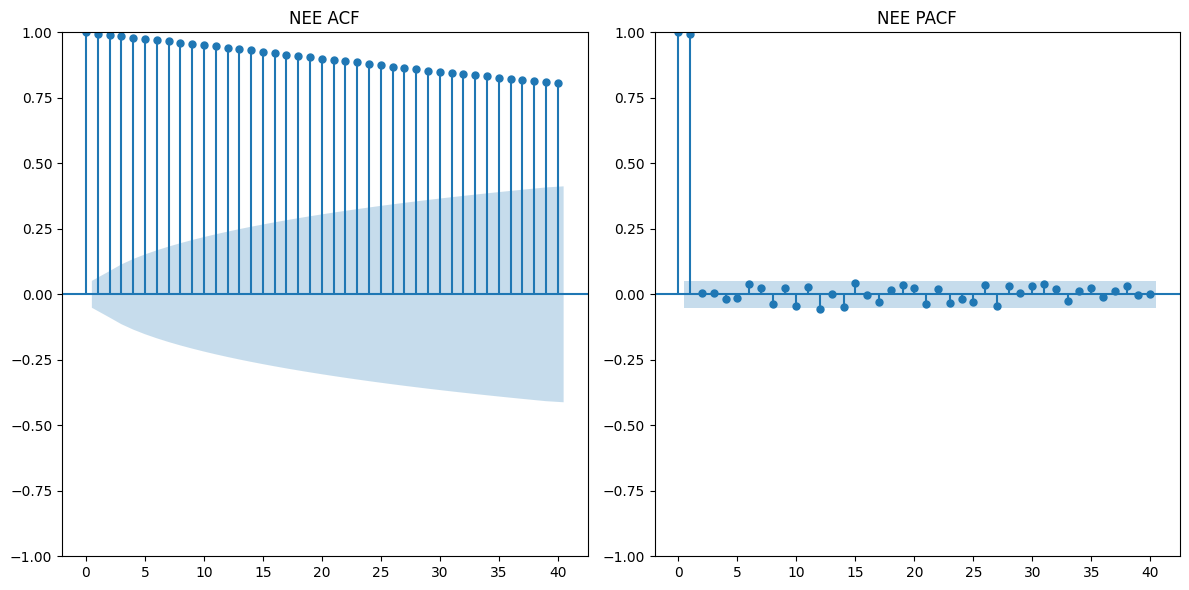

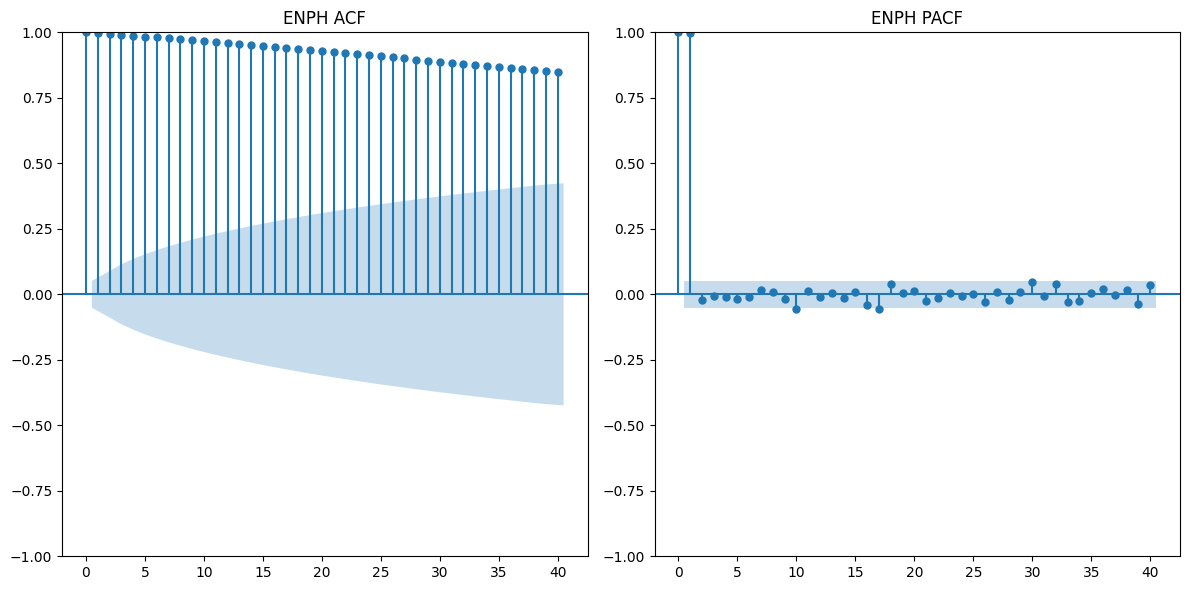

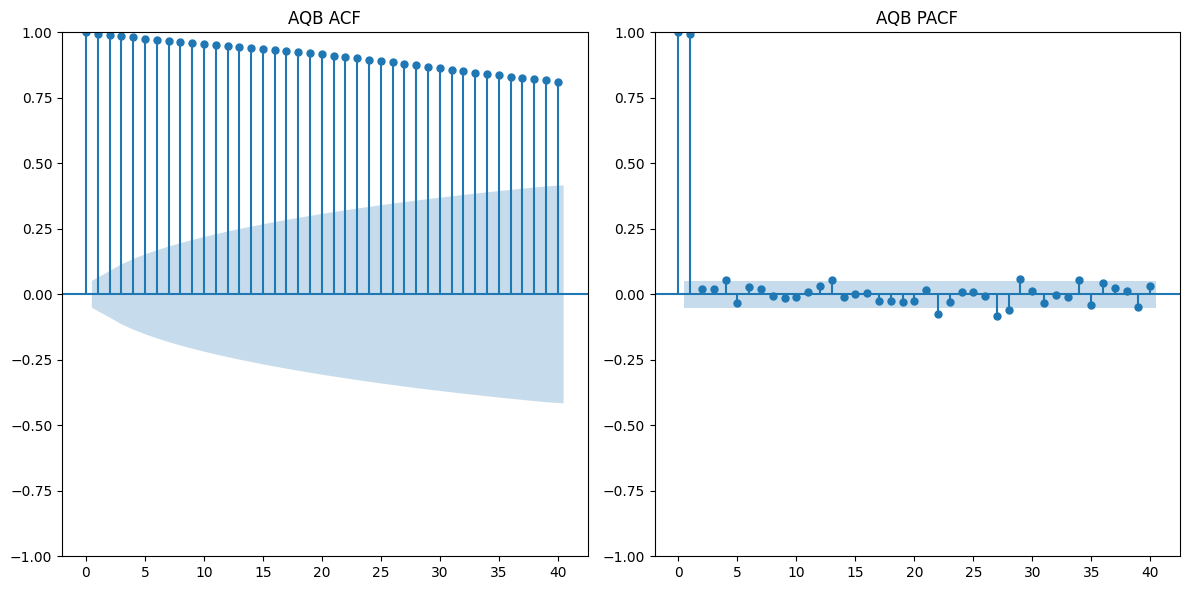

In [ ]:

# ACF and PACF plots for each stock's closing price
for ticker in tickers:
    plt.figure(figsize=(12, 6))

    # ACF
    plt.subplot(121)
    plot_acf(data[ticker]['Close'].dropna(), lags=40, ax=plt.gca())
    plt.title(f'{ticker} ACF')

    # PACF
    plt.subplot(122)
    plot_pacf(data[ticker]['Close'].dropna(), lags=40, ax=plt.gca())
    plt.title(f'{ticker} PACF')

    plt.tight_layout()
    plt.show()


# NEE ACF AND PACF

NEE

- ACF

The ACF plot for NEE shows a high degree of autocorrelation, with values close to 1 for many lags before a gradual decay. This is typical of non-stationary data where the current values depend heavily on the past values.

- PACF

The PACF shows a sharp cutoff after the first lag, with values close to 0 for subsequent lags. This may suggests that the current value is likely influenced by the immediately preceding value but not by values further back.

# ENPH ACF AND PACF

ENPH

- ACF

Similar to NEE, the ACF shows high autocorrelation values across many lags, with a slow decay over time, indicating that the data is likely non-stationary. The ACF suggests that differencing will be needed to achieve stationarity, implying an ARIMA model with a differencing component (d > 0).

- PACF

The PACF has a significant spike at lag 1 and then drops off sharply, similar to the pattern seen with NEE. This smay also suggest that values further back do not significantly influence the current value.

# AQB ACF AND PACF

AQB

- ACF

The ACF plot shows a strong and persistent autocorrelation, similar to the other stocks, with a gradual decline over time. This indicates non-stationarity and the need for differencing.

- PACF

The PACF shows a sharp cutoff after the first lag, with subsequent lags being much closer to zero. Like the other stocks, the sharp drop-off suggests the first lag carries most of the predictive power, while further lags do not.


## ARIMA Models


We will implement two ARIMA models for each stock:
1. **Baseline ARIMA Model**: Uses general assumptions for p, d, q values.
2. **Adjusted ARIMA Model**: Adjusts the p and q values based on the ACF and PACF plots.

Data was split into training (70%) and testing (30%) sets to evaluate the model performance.


ARIMA models for NEE built successfully.


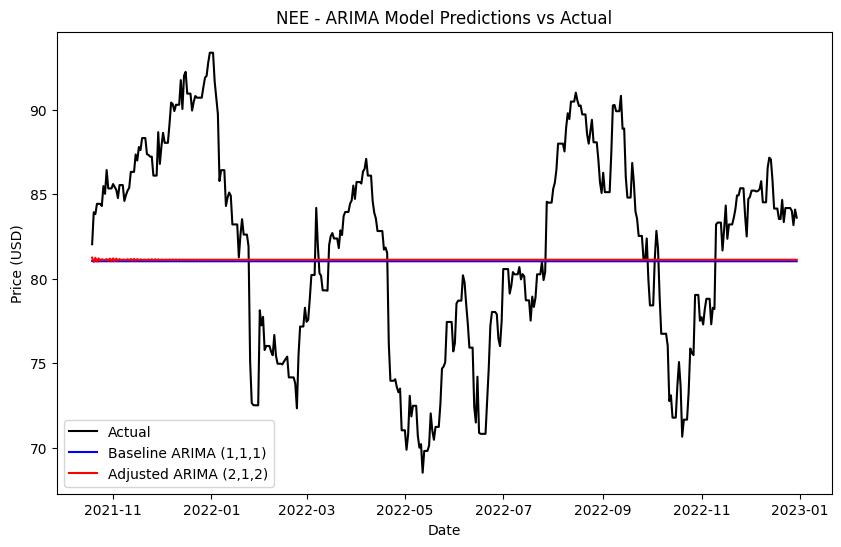

ARIMA models for ENPH built successfully.


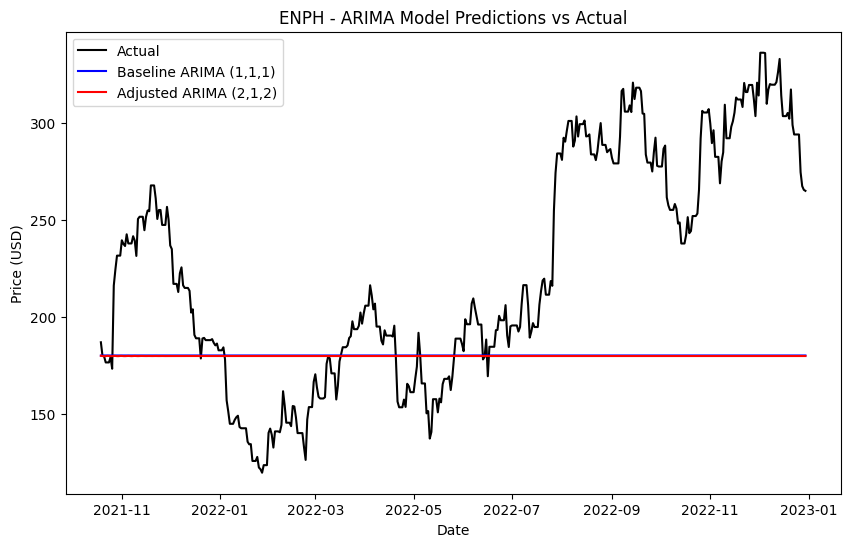

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA models for AQB built successfully.


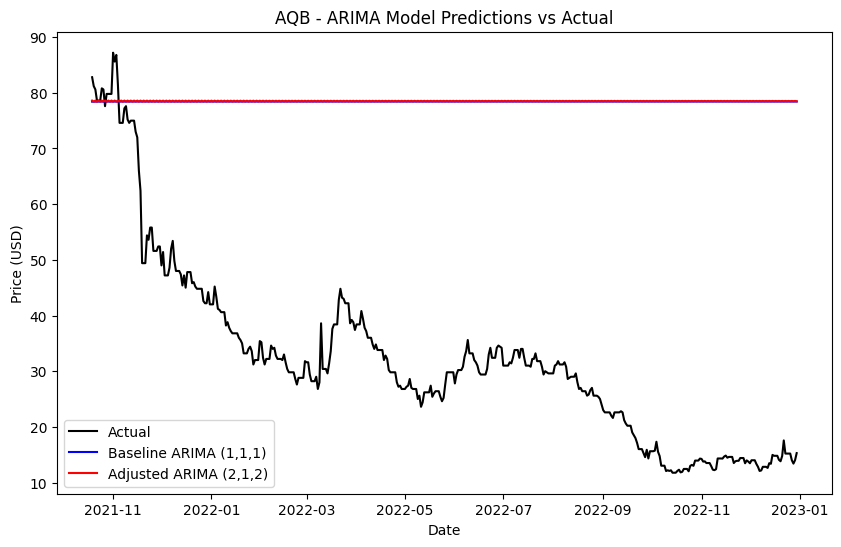

In [ ]:

import matplotlib.pyplot as plt

# Split data into training and testing sets (70% training, 30% testing)
train_size = 0.7

# Placeholder for model results
arima_results = {}

for ticker in tickers:
    stock_data = data[ticker]['Close'].dropna()

    # Split into train and test
    split_idx = int(len(stock_data) * train_size)
    train, test = stock_data[:split_idx], stock_data[split_idx:]

    # Baseline ARIMA model
    baseline_model = ARIMA(train, order=(1, 1, 1))
    baseline_fit = baseline_model.fit()
    baseline_predictions = baseline_fit.forecast(steps=len(test))

    # Adjusted ARIMA model (values from ACF/PACF can be customized based on the plots)
    adjusted_model = ARIMA(train, order=(2, 1, 2))
    adjusted_fit = adjusted_model.fit()
    adjusted_predictions = adjusted_fit.forecast(steps=len(test))

    # Store the results
    arima_results[ticker] = {
        "train": train,
        "test": test,
        "baseline_predictions": baseline_predictions,
        "adjusted_predictions": adjusted_predictions,
        "baseline_fit": baseline_fit,
        "adjusted_fit": adjusted_fit
    }

    print(f"ARIMA models for {ticker} built successfully.")

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot actual test data
    plt.plot(test.index, test, label='Actual', color='black')

    # Plot baseline predictions
    plt.plot(test.index, baseline_predictions, label='Baseline ARIMA (1,1,1)', color='blue')

    # Plot adjusted predictions
    plt.plot(test.index, adjusted_predictions, label='Adjusted ARIMA (2,1,2)', color='red')

    # Plot formatting
    plt.title(f"{ticker} - ARIMA Model Predictions vs Actual")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()



## Model Evaluation and Residual Analysis


To evaluate the performance of each ARIMA model, we will use the following metrics:
- **Mean Absolute Error (MAE)**:  Measures the average magnitude of errors between the predicted and actual values in the time series. It reflects how much, on average, the predictions deviate from the actual values.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values. Emphasizes larger errors more than smaller ones.
- **Root Mean Squared Error (RMSE)**: Square root of MSE, representing the error in the same units as the data.
- **R-Squared**: Represents the proportion of variance explained by the model.

We will also analyze the residuals (Actual - Predicted) for each model to check if the errors are normally distributed and unbiased.


In [ ]:

# Evaluate models using MAE, MSE, RMSE, and R-squared
for ticker in tickers:
    test = arima_results[ticker]['test']

    # Baseline model evaluation
    baseline_preds = arima_results[ticker]['baseline_predictions']
    baseline_mae = mean_absolute_error(test, baseline_preds)
    baseline_mse = mean_squared_error(test, baseline_preds)
    baseline_rmse = np.sqrt(baseline_mse)
    baseline_r2 = r2_score(test, baseline_preds)

    # Adjusted model evaluation
    adjusted_preds = arima_results[ticker]['adjusted_predictions']
    adjusted_mae = mean_absolute_error(test, adjusted_preds)
    adjusted_mse = mean_squared_error(test, adjusted_preds)
    adjusted_rmse = np.sqrt(adjusted_mse)
    adjusted_r2 = r2_score(test, adjusted_preds)

    # Print evaluation results
    print(f"{ticker} Baseline ARIMA Evaluation:")
    print(f"MAE: {baseline_mae:.4f}, MSE: {baseline_mse:.4f}, RMSE: {baseline_rmse:.4f}, R-Squared: {baseline_r2:.4f}")

    print(f"{ticker} Adjusted ARIMA Evaluation:")
    print(f"MAE: {adjusted_mae:.4f}, MSE: {adjusted_mse:.4f}, RMSE: {adjusted_rmse:.4f}, R-Squared: {adjusted_r2:.4f}")


NEE Baseline ARIMA Evaluation:
MAE: 5.0975, MSE: 35.3078, RMSE: 5.9420, R-Squared: -0.0155
NEE Adjusted ARIMA Evaluation:
MAE: 5.0833, MSE: 35.1854, RMSE: 5.9317, R-Squared: -0.0120
ENPH Baseline ARIMA Evaluation:
MAE: 57.5091, MSE: 5394.4844, RMSE: 73.4472, R-Squared: -0.5394
ENPH Adjusted ARIMA Evaluation:
MAE: 57.6389, MSE: 5419.1058, RMSE: 73.6146, R-Squared: -0.5465
AQB Baseline ARIMA Evaluation:
MAE: 46.5159, MSE: 2412.1364, RMSE: 49.1135, R-Squared: -7.9867
AQB Adjusted ARIMA Evaluation:
MAE: 46.5935, MSE: 2419.8813, RMSE: 49.1923, R-Squared: -8.0155


# NEE Model Evaluation (p,d,q)

**Baseline ARIMA (1,1,1):**

- MAE: 5.0975
- MSE: 35.3078
- RMSE: 5.9420
- R-Squared: -0.0155


**Adjusted ARIMA (2,1,2):**

- MAE: 5.0833
- MSE: 35.1854
- RMSE: 5.9317
- R-Squared: -0.0120


In the case of NEE, the baseline and adjusted ARIMA models show very similar performance metrics. The MAE, MSE, and RMSE values are almost identical, with a very minor improvement in the adjusted model.
The negative R-squared values in both models indicate that the models are performing worse than a simple horizontal line (mean) model. This may  suggest that neither ARIMA model is capturing the complexity of this particular stock’s behavior, the flat predictions seen in the adjusted model confirm this. The poor fit may indicate that the stock has underlying seasonal patterns or other factors that ARIMA cannot capture effectively.

# ENPH Model Evaluation (p,d,q)


**Baseline ARIMA (1,1,1):**

- MAE: 57.5091
- MSE: 5394.4844
- RMSE: 73.4472
- R-Squared: -0.5394

**Adjusted ARIMA (2,1,2):**

- MAE: 57.6389
- MSE: 5419.1058
- RMSE: 73.6146
- R-Squared: -0.5465



Similar to NEE´s models, the performance of both the baseline and adjusted models for ENPH are nearly identical, with minimal difference in all metrics. More specifically, the adjusted model shows slightly worse results in terms of MAE and MSE. This suggests that these models are unable to effectively predict future stock movements, likely due to the high volatility and non-linearity in ENPH’s stock price.


# AQB Model Evaluation (p,d,q)


**Baseline ARIMA (1,1,1):**

- MAE: 46.5159
- MSE: 2412.1364
- RMSE: 49.1135
- R-Squared: -7.9867

**Adjusted ARIMA (2,1,2):**

- MAE: 46.5935
- MSE: 2419.8813
- RMSE: 49.1923
- R-Squared: -8.0155

Both the baseline and adjusted models for AQB are performing extremely poorly, with very high MAE, MSE, and RMSE values, and very negative R-squared values. These negative R-squared values most liekly indicate that the model is not explaining any of the variance in the data, and the predictions are essentially no better than a normal person guessing or making assumptions. The stock shows a strong downward trend in the actual data, while the adjusted model provides flat predictions.

#Final Regards

Ultimately, across all three stocks, the models displayed similar patterns of performance, with the adjusted models providing only marginal improvements over the baselines. Overall perfomance of the models across all stocks was extremely poor.

In order to improve the model performance, we could utilize the following techniques:

- Introduce seasonality to the models (SARIMA.) This could help capture cyclical or seasonal patterns in the stock data that ARIMA failed to account for.

- More complex models such as LSTM (Long Short-Term Memory) could better handle the non-linearity and volatility observed in these stocks.

- Feature Engineering: Adding more features, such as volume, economic indicators, or sentiment analysis from market news.  

However, all of these are out of the scope of the assingment but could proof to be usefull to predict the behaviour of these 3 stocks.